In [ ]:
import pandas as pd

df = pd.read_csv('parentDatasetFirstPass.csv')
df.head()

,name,year,pressure,r34avg,roci,envp,outerEW,innerEW,momentumRatio,coriolis,winds
0,IAN,2022,985.0,60.0,150.0,1008.0,NaN,15.0,0.100000,0.000133,65.0
1,IAN,2022,983.0,67.5,150.0,1009.0,NaN,15.0,0.100000,0.000088,68.0
2,IAN,2022,981.0,75.0,150.0,1009.0,NaN,15.0,0.100000,0.000022,70.0
3,IAN,2022,979.0,80.0,150.0,1009.0,NaN,18.0,0.120000,-0.000050,75.0
4,IAN,2022,976.0,85.0,150.0,1009.0,NaN,20.0,0.133333,-0.000110,80.0


In [ ]:
# Select the feature columns (excluding 'outerEW')
features = df[['pressure', 'r34avg', 'roci', 'envp', 'innerEW', 'momentumRatio', 'coriolis']]

# Select the target column
target = df['winds']

print(features.head())
print(target.head())

   pressure  r34avg   roci    envp  innerEW  momentumRatio  coriolis
0     985.0    60.0  150.0  1008.0     15.0       0.100000  0.000133
1     983.0    67.5  150.0  1009.0     15.0       0.100000  0.000088
2     981.0    75.0  150.0  1009.0     15.0       0.100000  0.000022
3     979.0    80.0  150.0  1009.0     18.0       0.120000 -0.000050
4     976.0    85.0  150.0  1009.0     20.0       0.133333 -0.000110
0    65.0
1    68.0
2    70.0
3    75.0
4    80.0
Name: winds, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Option 1: Min-Max Scaling (scales features to [0, 1])
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network model
model = models.Sequential()

# Add an Input layer
model.add(layers.Input(shape=(X_train.shape[1],)))

# Hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Output layer
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9605.6738 - mae: 95.5378 - val_loss: 8786.6699 - val_mae: 90.9211
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7823.2852 - mae: 85.4183 - val_loss: 4547.3301 - val_mae: 62.6842
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3228.3745 - mae: 49.9994 - val_loss: 1025.1776 - val_mae: 25.1506
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 922.6746 - mae: 24.2370 - val_loss: 895.3173 - val_mae: 23.8558
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 813.6492 - mae: 23.0577 - val_loss: 866.4339 - val_mae: 23.5679
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 803.8400 - mae: 22.7873 - val_loss: 834.5250 - val_mae: 23.1467
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 749.6175 - mae: 22.1754 - val_loss: 795.8906 - val_mae: 22.6869
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 711.1336 - mae: 21.5798 - val_loss: 750.4894 - val_mae: 22.1422
Epoch 9/50
73/73 ━

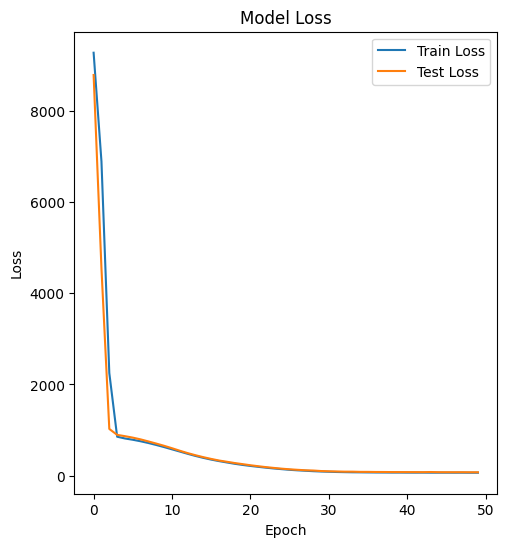

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


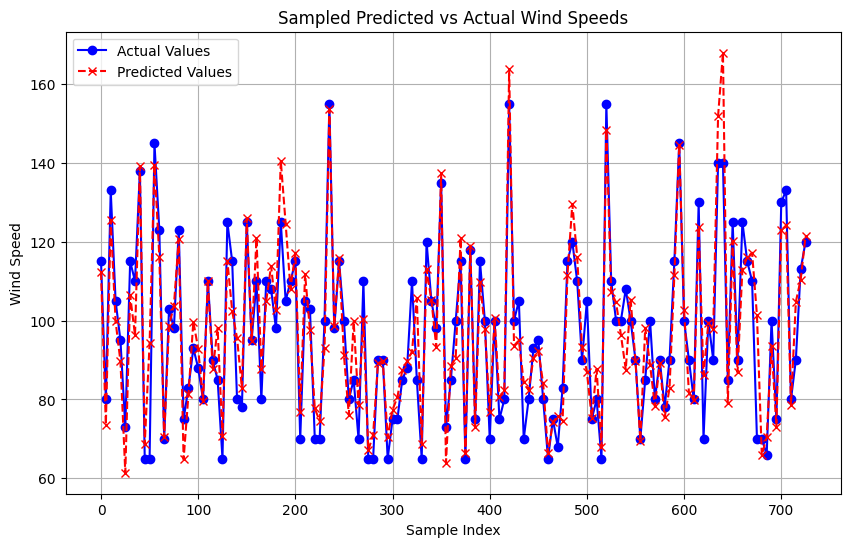

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_test = np.array(y_test)

predictions = model.predict(X_test)

sample_indices = np.arange(0, len(y_test), step=5)

plt.figure(figsize=(10, 6))
plt.plot(sample_indices, y_test[sample_indices], label='Actual Values', color='blue', marker='o')

plt.plot(sample_indices, predictions[sample_indices], label='Predicted Values', color='red', linestyle='--', marker='x')

plt.title('Sampled Predicted vs Actual Wind Speeds')
plt.xlabel('Sample Index')
plt.ylabel('Wind Speed')

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_test = np.array(y_test)
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Average RMSE: {rmse}')

# Calculate Bias
bias = np.mean(predictions - y_test)
print(f'Average Bias: {bias}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Average RMSE: 8.313493550792314
Average Bias: 0.1972643048310083


In [ ]:
import numpy as np
import pandas as pd
import math

pressure = 926
r34avg = 136.25
roci = 250
envp = 1004
innerEW = 12
lat = 19
momentumRatio = innerEW/roci
coriolis = 2 * (7.292 * 10**(-5)) * math.sin(-1 * lat)


# Example new feature data
new_feature_data = {
    'pressure': [pressure],
    'r34avg': [r34avg],
    'roci': [roci],
    'envp': [envp],
    'innerEW': [innerEW],
    'momentumRatio': [momentumRatio],
    'coriolis': [coriolis]
}
new_feature_df = pd.DataFrame(new_feature_data)

# Scale the new feature data
scaler = MinMaxScaler()
new_feature_scaled  = scaler.fit_transform(new_feature_df)

# Verify the scaled data
print("Scaled new feature data:", new_feature_scaled)

# Predict using the trained model
new_predictions = model.predict(new_feature_scaled)

# Verify predictions
print("Model predictions:", new_predictions)

# Create a DataFrame to display the results
results_df = new_feature_df.copy()
results_df['Predicted Winds'] = new_predictions.flatten()  # Flatten if needed

# Display the results
print("Results DataFrame:\n", results_df)

Scaled new feature data: [[0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model predictions: [[87.852806]]
Results DataFrame:
    pressure  r34avg  roci  envp  innerEW  momentumRatio  coriolis  \
0       926  136.25   250  1004       12          0.048 -0.000022   

   Predicted Winds  
0        87.852806  
